In [14]:
import os
import csv
import cv2
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Dropout, ELU
from keras.layers.convolutional import Convolution2D, Cropping2D
from keras import backend as K

def load_driving_log(path='./data', split='\\'):
    csv = pd.read_csv(os.path.join(path, 'driving_log.csv'), header=None,
                          names=['center','left','right','angle','throttle','break','speed'])

    csv.center = csv.center.str.split(split).str[-1]
    csv.left = csv.left.str.split(split).str[-1]
    csv.right = csv.right.str.split(split).str[-1]
    return csv

def generator(samples, path='./data/IMG', batch_size=32):
    num_samples = len(samples)
    print(num_samples)
    while 1:
        shuffle(samples)
    
        for offset in range(0, num_samples, batch_size):

            images = []
            angles = []
            batch_samples = samples[offset:offset + batch_size]

            for batch_sample in batch_samples:
                name = os.path.join(path, 'IMG', batch_sample[0])
                image = cv2.resize(cv2.imread(name), (200, 100), interpolation=cv2.INTER_AREA)
                image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
                images.append(image)
                angle = float(batch_sample[3])
                angles.append(angle)

            yield shuffle(np.array(images), np.array(angles))

In [26]:
import csv
column_names = ['center', 'left', 'right',
                'steering', 'throttle', 'brake', 'speed']
df = pd.read_csv('./data/driving_log.csv',names=column_names) 
df.head()

,center,left,right,steering,throttle,brake,speed
0,/Users/jaydenmilton/Documents/IMG/center_2018_...,/Users/jaydenmilton/Documents/IMG/left_2018_04...,/Users/jaydenmilton/Documents/IMG/right_2018_0...,0.00,0.000000,0,0.840298
1,/Users/jaydenmilton/Documents/IMG/center_2018_...,/Users/jaydenmilton/Documents/IMG/left_2018_04...,/Users/jaydenmilton/Documents/IMG/right_2018_0...,0.00,0.000000,0,0.828530
2,/Users/jaydenmilton/Documents/IMG/center_2018_...,/Users/jaydenmilton/Documents/IMG/left_2018_04...,/Users/jaydenmilton/Documents/IMG/right_2018_0...,0.00,0.000000,0,0.816926
3,/Users/jaydenmilton/Documents/IMG/center_2018_...,/Users/jaydenmilton/Documents/IMG/left_2018_04...,/Users/jaydenmilton/Documents/IMG/right_2018_0...,0.00,0.000000,0,0.803865
4,/Users/jaydenmilton/Documents/IMG/center_2018_...,/Users/jaydenmilton/Documents/IMG/left_2018_04...,/Users/jaydenmilton/Documents/IMG/right_2018_0...,-0.35,0.417969,0,1.473115


In [16]:
df.shape

(6853, 7)

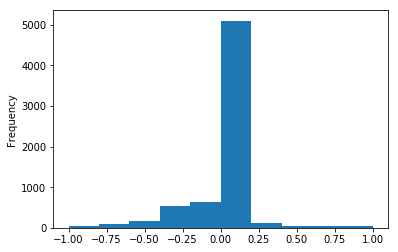

In [17]:
df.steering.plot.hist()

In [18]:
df.steering.describe()

count    6853.000000
mean       -0.036254
std         0.192461
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: steering, dtype: float64

In [19]:
df.brake.value_counts()

0    6853
Name: brake, dtype: int64

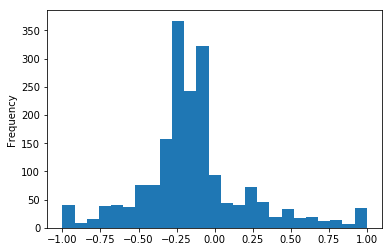

In [20]:
df.query('steering != 0')['steering'].plot.hist(bins=25)

In [21]:
from pathlib import PurePosixPath
import cv2
import os
from datetime import datetime
import matplotlib.gridspec as gridspec

In [29]:
lines = df.values
images = []
measurements = []
#for each driving data
for line in lines:
    steering_center = float(line[3])
    # create adjusted steering measurements for the side camera images
    correction = 0.6 # this is a parameter to tune
    steering_left = steering_center + correction
    steering_right = steering_center - correction

    # read in images from center, left and right cameras
    path = "./data/IMG/" # fill in the path to your training IMG directory
    img_center = cv2.imread(path + line[0].split('/')[-1])
    img_left = cv2.imread(path + line[1].split('/')[-1])
    img_right = cv2.imread(path + line[2].split('/')[-1])

    # add images and angles to data set
    images.extend([img_center, img_left, img_right])
    measurements.extend([steering_center, steering_left, steering_right])
    source_path = line[0]
    filename = source_path.split('/')[-1]
    current_path = './data/IMG/'+filename
    image = cv2.imread(current_path)
    images.append(image)
    measurement = float(line[3]) 
    measurements.append(measurement)

In [30]:

figfig  ==  pltplt..figurefigure()()
 # Center Image# Cente 
ax1 = fig.add_subplot(3,1,1)
#ax1.title("Center Image")
ax1.axis('off')
ax1.imshow(images[0])

# Left Image
ax2 = fig.add_subplot(3,1,2)
#ax2.title("Left Image")
ax2.axis('off')
ax2.imshow(images[1])

# Right Image
ax3 = fig.add_subplot(3,1,3)
#ax3.title("Right Image")
ax3.axis('off')
ax3.imshow(images[2])

SyntaxError: invalid syntax (<ipython-input-30-0530ed634df3>, line 2)

In [ ]:
path = '/Users/jaydenmilton/Documents/Self-Driving-Car-Engineer-Nanodegree-Program/CarND-Behavioral-Cloning-P3/data'
center_camera_files=image_files(path+'/IMG/')
left_camera_files=image_files(path+'/IMG/',camera='left')
right_camera_files=image_files(path+'/IMG/',camera='right')

In [24]:
print(len(left_camera_files),len(center_camera_files),len(right_camera_files))

4966 4966 4966


In [25]:
def plot_images_from_row(row, image_preprocess=lambda x: x):
    f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10, 5))
    image = plt.imread(path+ row['left'].strip())
    ax1.imshow(idf(image))
    ax1.grid(False)
    
    image = plt.imread(path+ row['center'])
    ax2.imshow(df(image))
    ax2.grid(False)
    image = plt.imread(path+ row['right'].strip())
    ax3.imshow(df(image))
    ax3.grid(False)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jaydenmilton/Documents/Self-Driving-Car-Engineer-Nanodegree-Program/CarND-Behavioral-Cloning-P3/data/Users/jaydenmilton/Documents/IMG/left_2018_04_26_19_06_59_225.jpg'

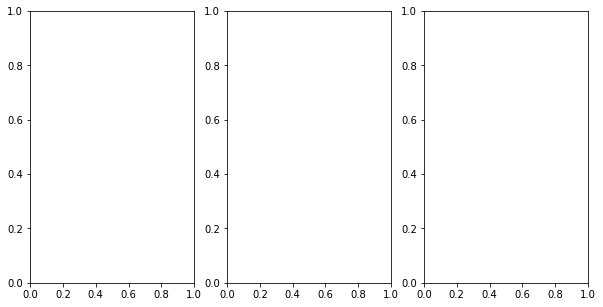

In [13]:
no_turn = df[df['steering'] == 0.0 ].iloc[0]
plot_images_from_row(no_turn)

In [33]:
from  moviepy.editor import *
from IPython.display import HTML

In [34]:
def create_movie_from_log(log_path,log_file='driving_log.csv',skiprows=1,clip_name='log_clip.mp4', sample_every=1):
    column_names = ['center', 'left', 'right',
                    'steering', 'throttle', 'brake', 'speed']
    data_df = pd.read_csv(log_path+'/'+log_file,
                          names=column_names, skiprows=skiprows)
    
    clip_data=[load_and_draw(data_df, log_path, idx) for idx in data_df.index if not idx % sample_every]
    clip = ImageSequenceClip(clip_data, fps=50)
    %time clip.write_videofile(clip_name, audio=False)

In [35]:

clip_nameclip_nam ='udacity_sample.mp4'
create_movie_from_log('/u200/Udacity/behavioral-cloning-project/data',skiprows=1,clip_name=clip_name,sample_every=1)

NameError: name 'clip_name' is not defined

In [36]:
ls

=4.1.0                    data/                     model.py.ipynb
CarND-Behavioral-Cloning/ drive.py                  run1/
Exploration.ipynb         examples/                 steering1.png
LICENSE                   model.h5                  video.py
README.md                 model.json                writeup_template.md


In [4]:
X_train = np.array(images)
y_train = np.array(measurements)

In [5]:
# Helper functions
import random
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

def show_images(images, labels, rows=4, cols=5, figsize=(20,10), gray=False):
    images_to_show = len(images)
    fig, axis = plt.subplots(rows, cols, figsize=figsize)
    fig.subplots_adjust(hspace = .5, wspace=.001)
    axis = axis.ravel()
    for i in range(images_to_show):
        image = images[i]
        axis[i].axis('off')
        if (gray):
            axis[i].imshow(image.squeeze(), cmap='gray')
        else:
            axis[i].imshow(image)
        axis[i].set_title(labels[i])

def show_random_image(X,y,rows=4, cols=5, figsize=(20,10),gray=False):
    # show images of random data points
    images_to_show = 4
    images = []
    labels =[]
    for i in range(images_to_show):
        index = random.randint(0, len(X))
        images.append(X[index])
        labels.append(y[index])

    show_images(images,labels,rows,cols,figsize,gray)

TypeError: Image data cannot be converted to float

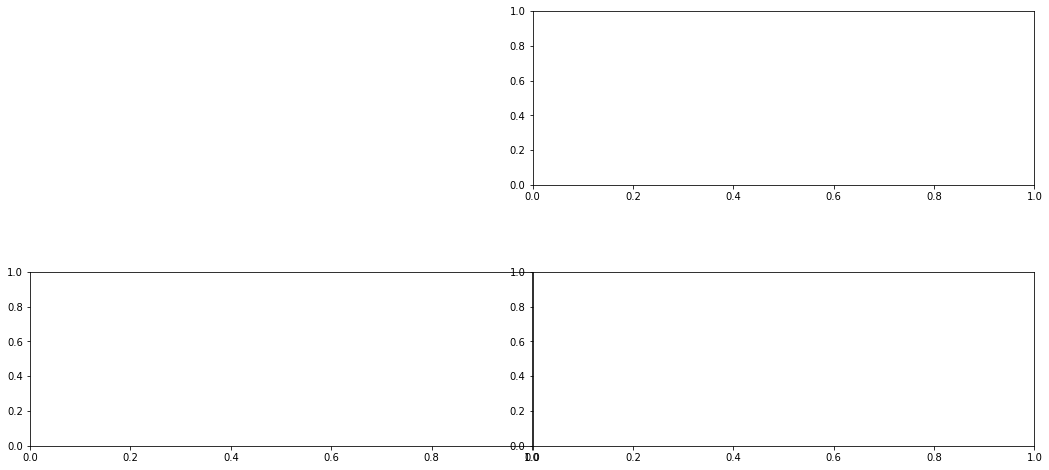

In [6]:
show_random_image(X_train, y_train, 2, 2, (18,8))

In [11]:
#import data 

lines = []
df = pd.read_csv("/Users/jaydenmilton/Documents/Self-Driving-Car-Engineer-Nanodegree-Program/CarND-Behavioral-Cloning-P3/data/driving_log.csv")
df.describe(include='all')
'''
with open(file_name) as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
'''
images = []
measurements = []

for line in lines:
#    image = cv2.imread(line[0])
    source_path=line[0]
#assert image is not None
    filename = source_path.split('/')[-1]
    current_path = '/Users/jaydenmilton/Documents/Self-Driving-Car-Engineer-Nanodegree-Program/CarND-Behavioral-Cloning-P3/data/IMG/' + filename
    image = cv2.imread(current_path)
    if image is None:
        print("Image path incorrect: ", current_path)
        continue  # skip adding these rows in the for loop

    images.append(image)
    measurement= float(line[3])
    measurements.append(measurement)

X_train = np.array(images)
y_train = np.array(measurements)


from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape=(160,320,3)))
model.add(Dense(1))

model.compile(loss='mse',optimizer='adam')
model.fit(X_train, y_train, validation_split=0.2)

model.save('model.h5')


Using TensorFlow backend.


ValueError: Error when checking model input: expected flatten_input_1 to have 4 dimensions, but got array with shape (0, 1)

In [6]:
pwd

'/Users/jaydenmilton/Documents/Self-Driving-Car-Engineer-Nanodegree-Program/CarND-Behavioral-Cloning-P3'

In [9]:
import pandas as pd
df = pd.read_csv('/Users/jaydenmilton/Documents/Self-Driving-Car-Engineer-Nanodegree-Program/CarND-Behavioral-Cloning-P3/data/driving_log.csv', usecols=[0,1,2,3])
df.info

<bound method DataFrame.info of      /Users/jaydenmilton/Documents/IMG/center_2018_04_26_19_06_59_225.jpg  \
0     /Users/jaydenmilton/Documents/IMG/center_2018_...                     
1     /Users/jaydenmilton/Documents/IMG/center_2018_...                     
2     /Users/jaydenmilton/Documents/IMG/center_2018_...                     
3     /Users/jaydenmilton/Documents/IMG/center_2018_...                     
4     /Users/jaydenmilton/Documents/IMG/center_2018_...                     
5     /Users/jaydenmilton/Documents/IMG/center_2018_...                     
6     /Users/jaydenmilton/Documents/IMG/center_2018_...                     
7     /Users/jaydenmilton/Documents/IMG/center_2018_...                     
8     /Users/jaydenmilton/Documents/IMG/center_2018_...                     
9     /Users/jaydenmilton/Documents/IMG/center_2018_...                     
10    /Users/jaydenmilton/Documents/IMG/center_2018_...                     
11    /Users/jaydenmilton/Documents/IMG/cent

In [6]:
driving_log = load_driving_log()
driving_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3520 entries, 0 to 3519
Data columns (total 7 columns):
center      3520 non-null object
left        3520 non-null object
right       3520 non-null object
angle       3520 non-null object
throttle    3520 non-null object
break       3520 non-null object
speed       3520 non-null object
dtypes: object(7)
memory usage: 192.6+ KB


In [7]:
driving_log.head()

,center,left,right,angle,throttle,break,speed
0,/Users/jaydenyuen/Documents/Self-Driving-Car-E...,/Users/jaydenyuen/Documents/Self-Driving-Car-E...,/Users/jaydenyuen/Documents/Self-Driving-Car-E...,0,0,0,6.48E-06
1,/Users/jaydenyuen/Documents/Self-Driving-Car-E...,/Users/jaydenyuen/Documents/Self-Driving-Car-E...,/Users/jaydenyuen/Documents/Self-Driving-Car-E...,0,0,0,5.29E-06
2,/Users/jaydenyuen/Documents/Self-Driving-Car-E...,/Users/jaydenyuen/Documents/Self-Driving-Car-E...,/Users/jaydenyuen/Documents/Self-Driving-Car-E...,0,0,0,3.89E-06
3,/Users/jaydenyuen/Documents/Self-Driving-Car-E...,/Users/jaydenyuen/Documents/Self-Driving-Car-E...,/Users/jaydenyuen/Documents/Self-Driving-Car-E...,0,0,0,2.43E-06
4,/Users/jaydenyuen/Documents/Self-Driving-Car-E...,/Users/jaydenyuen/Documents/Self-Driving-Car-E...,/Users/jaydenyuen/Documents/Self-Driving-Car-E...,0,0.1398872,0,0.0505136


In [8]:
train_samples, validation_samples = train_test_split(driving_log, test_size=0.2)

In [9]:
print('Driving log length:', len(driving_log))
print('Training samples length:', len(train_samples))
print('Validation samples length:', len(validation_samples))

Driving log length: 3520
Training samples length: 2816
Validation samples length: 704


In [10]:
print(list(train_samples))
train_generator = generator(list(train_samples), batch_size=32)
validation_generator = generator(list(validation_samples), batch_size=32)

['center', 'left', 'right', 'angle', 'throttle', 'break', 'speed']


In [11]:
# 1. define basic model
model = Sequential()
# 6. add cropping
model.add(Cropping2D(cropping=((70, 25), (0, 0)), input_shape=(160, 320, 3)))
model.add(Lambda(lambda x: x / 255 - 0.5, trainable=False))
model.add(Convolution2D(24, 5, 5, subsample=(2, 2), border_mode="valid"))
model.add(ELU())
model.add(Convolution2D(36, 5, 5, subsample=(2, 2), border_mode="valid"))
model.add(ELU())
model.add(Convolution2D(48, 5, 5, subsample=(2, 2), border_mode="valid"))
model.add(ELU())
model.add(Convolution2D(64, 3, 3, border_mode="valid"))
model.add(ELU())
model.add(Convolution2D(64, 3, 3, border_mode="valid"))
model.add(Dropout(0.2))
model.add(ELU())
model.add(Flatten())
model.add(Dense(100))
model.add(ELU())
model.add(Dense(50))
model.add(ELU())
model.add(Dense(10))
model.add(ELU())
model.add(Dense(1, trainable=False))

model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
cropping2d_1 (Cropping2D)        (None, 65, 320, 3)    0           cropping2d_input_1[0][0]         
____________________________________________________________________________________________________
lambda_1 (Lambda)                (None, 65, 320, 3)    0           cropping2d_1[0][0]               
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 31, 158, 24)   1824        lambda_1[0][0]                   
____________________________________________________________________________________________________
elu_1 (ELU)                      (None, 31, 158, 24)   0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [13]:
import seaborn as sns
%matplotlib inline
sns.distplot(driving_log.steering);
plt.savefig("steering1.png")
plt.show()

AttributeError: 'DataFrame' object has no attribute 'steering'

In [48]:
import os
import pandas as pd
import numpy as np
import cv2
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, MaxPooling2D, Conv2D, Lambda
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.utils import shuffle

import tensorflow as tf

epochs = 50
batch_size = 128
dataset_dir = "/Users/jaydenmilton/Documents/Self-Driving-Car-Engineer-Nanodegree-Program/data/IMG"
image_columns = 32
image_rows = 16
image_channels = 1
side_shift = 0.3


def preproccess_image(image):
    image = (cv2.cvtColor(image, cv2.COLOR_BGR2HSV))[:, :, 1]
    image = image.reshape(160, 320, 1)
    image = cv2.resize(image, (image_columns, image_rows))
    return image


def prepare(data):
    x, y = [], []

    for i in range(len(data)):
        line_data = data.iloc[i]
        y_steer = line_data['steering']
        path_center = line_data['center'].strip()
        path_left = line_data['left'].strip()
        path_right = line_data['right'].strip()

        for path, shift in [(path_center, 0), (path_left, side_shift), (path_right, -side_shift)]:
            # read image
            image_path = os.path.join(dataset_dir, path)
            image = cv2.imread(image_path)

            # preprocess image
            image = preproccess_image(image)

            # add image
            x.append(image)
            y.append(y_steer + shift)

            # add flipped image
            image = image[:, ::-1]
            x.append(image)
            y.append(-(y_steer + shift))

    return np.array(x).astype('float32'), np.array(y).astype('float32')


def model():
    model = Sequential()
    model.add(Lambda(lambda x: x / 127.5 - 1.0, input_shape=(image_rows, image_columns, image_channels)))
    model.add(Conv2D(2, 3, 3, border_mode='valid', activation='elu'))
    model.add(MaxPooling2D((4, 4), (4, 4), 'valid'))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(1))

    return model


if __name__ == '__main__':
    print("Loading images...")

    data = pd.read_csv(os.path.join(dataset_dir, "/Users/jaydenmilton/Documents/Self-Driving-Car-Engineer-Nanodegree-Program/data/driving_log.csv"))

    X_train, y_train = prepare(data)
    X_train, y_train = shuffle(X_train, y_train)
    X_train = np.expand_dims(X_train, axis=3)

    model = model()
    model.compile('adam', 'mean_squared_error', ['mean_squared_error'])
    checkpoint = ModelCheckpoint("model.h5", monitor='val_mean_squared_error', verbose=1,
                                  save_best_only=True, mode='min')
    early_stop = EarlyStopping(monitor='val_mean_squared_error', min_delta=0.0001, patience=4,
                                verbose=1, mode='min')
    model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=epochs, verbose=1,
                      callbacks=[checkpoint, early_stop], validation_split=0.15, shuffle=True)

    print("Saving model...")
    with open("model.json", 'w') as outfile:
        outfile.write(model.to_json())

    print("Finished.")

Loading images...


FileNotFoundError: File b'/Users/jaydenmilton/Documents/Self-Driving-Car-Engineer-Nanodegree-Program/data/driving_log.csv' does not exist

In [ ]:
### data preprocessing 

X_train = np.array(images)
y_train = np.array(measurements)

from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda

model = Sequential()
#first normalize the data image
model.add = (Lambda(lambda x:x /255.0), input_shape = (160,320,3))
#model.add = (Lambda(lambda x:x /255.0 -0.0), input_shape = (160,320,3))


model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mse', optimizer="adam")
#reducing the epoch, since the data had been overfitting 
model.fit(X_train, y_train, validation_split=0.2,shuffle=True, nb_epoch-5)




In [ ]:
# data augrementation 
#numpy/cv2 has that 
#https://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html#flip


import numpy as np
image_flipped = np.fliplr(image)
measurement_flipped = -measurement



In [ ]:
# multi-camera training 


with open(csv_file, 'r') as f:
        reader = csv.reader(f)
        for row in reader:
            steering_center = float(row[3])

            # create adjusted steering measurements for the side camera images
            correction = 0.2 # this is a parameter to tune
            steering_left = steering_center + correction
            steering_right = steering_center - correction

            # read in images from center, left and right cameras
            path = "..." # fill in the path to your training IMG directory
            img_center = process_image(np.asarray(Image.open(path + row[0])))
            img_left = process_image(np.asarray(Image.open(path + row[1])))
            img_right = process_image(np.asarray(Image.open(path + row[2])))

            # add images and angles to data set
            car_images.extend(img_center, img_left, img_right)
            steering_angles.extend(steering_center, steering_left, steering_right)

In [ ]:
#copping the image 

from keras.models import Sequential, Model
from keras.layers import Cropping2D
import cv2

# set up cropping2D layer
model = Sequential()
model.add(Cropping2D(cropping=((50,20), (0,0)), input_shape=(3,160,320)))
...

In [ ]:
#Nvida network 
#fewer epoch steps that makes better 

In [ ]:
#visualizing loss 

from keras.models import Model
import matplotlib.pyplot as plt

history_object = model.fit_generator(train_generator, samples_per_epoch =
    len(train_samples), validation_data = 
    validation_generator,
    nb_val_samples = len(validation_samples), 
    nb_epoch=5, verbose=1)

### print the keys contained in the history object
print(history_object.history.keys())

### plot the training and validation loss for each epoch
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()

In [50]:
#Generators

import os
import csv

samples = []
with open('./driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        samples.append(line)

from sklearn.model_selection import train_test_split
train_samples, validation_samples = train_test_split(samples, test_size=0.2)

import cv2
import numpy as np
import sklearn

def generator(samples, batch_size=32):
    num_samples = len(samples)
    while 1: # Loop forever so the generator never terminates
        shuffle(samples)
        for offset in range(0, num_samples, batch_size):
            batch_samples = samples[offset:offset+batch_size]

            images = []
            angles = []
            for batch_sample in batch_samples:
                name = './IMG/'+batch_sample[0].split('/')[-1]
                center_image = cv2.imread(name)
                center_angle = float(batch_sample[3])
                images.append(center_image)
                angles.append(center_angle)

            # trim image to only see section with road
            X_train = np.array(images)
            y_train = np.array(angles)
            yield sklearn.utils.shuffle(X_train, y_train)

            '''
# compile and train the model using the generator function
train_generator = generator(train_samples, batch_size=32)
validation_generator = generator(validation_samples, batch_size=32)

ch, row, col = 3, 80, 320  # Trimmed image format

model = Sequential()
# Preprocess incoming data, centered around zero with small standard deviation 
model.add(Lambda(lambda x: x/127.5 - 1.,
        input_shape=(ch, row, col),
        output_shape=(ch, row, col)))
model.add(... finish defining the rest of your model architecture here ...)

model.compile(loss='mse', optimizer='adam')
model.fit_generator(train_generator, samples_per_epoch= /
            len(train_samples), validation_data=validation_generator, /
            nb_val_samples=len(validation_samples), nb_epoch=3)

"""
If the above code throw exceptions, try 
model.fit_generator(train_generator, steps_per_epoch= len(train_samples),
validation_data=validation_generator, validation_steps=len(validation_samples), epochs=5, verbose = 1)
"""

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-50-b1fca75a62ac>, line 62)